In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from sklearn.utils import shuffle
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


2024-12-18 15:41:30.094484: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 15:41:30.251329: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 15:41:30.378789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734516690.497180   11450 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734516690.528168   11450 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 15:41:30.800330: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:

# Load the dataset
data1 = pd.read_csv('updated_file.csv')  # Replace with the path to your file

# Define the number of nodes and edges
V = 23  # Number of nodes
E = 74  # Number of edges (utilization columns)

# Separate the input features (source, destination, bandwidth, current utilization)
input_features = data1.iloc[:, :-74]  # All columns except the last E columns (current Utilization columns)
current_utilization = data1.iloc[:, -74:]  # Current utilization columns

# Concatenate the current utilization with input features for the model input
X = pd.concat([input_features, current_utilization], axis=1).values

# Define the target features (next utilization values)
y = current_utilization.shift(-1).dropna().values  # Shift the target utilization columns to represent the next state

# Adjust the input data to match the shape of `y`
X = X[:-1, :]  # Remove the last row in X to align with the target `y`

# Randomize the dataset (shuffle X and y together)
X, y = shuffle(X, y, random_state=42)

# Split into training, validation, and test sets
# First split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Then split temp into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model
input_size = 2 * V + E   # -1 as it counts from 0
output_size = E
#  Model 1 Greater Complexity
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# model = models.Sequential()
# model.add(layers.Input(shape=(input_size,)))
# model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(output_size, activation='linear'))

# optimizer = Adam(learning_rate=0.0001)
# model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# # Evaluate the model
# test_loss, test_mae = model.evaluate(X_test, y_test)
# print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")
# Model 2 Lower complexity
model = models.Sequential()
model.add(layers.Input(shape=(input_size,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(output_size, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Epoch 1/50


2024-12-18 15:41:59.475704: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2306 - mae: 0.0757 - val_loss: 3.4985e-04 - val_mae: 0.0145
Epoch 2/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.4925e-04 - mae: 0.0145 - val_loss: 3.5184e-04 - val_mae: 0.0145
Epoch 3/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5242e-04 - mae: 0.0145 - val_loss: 3.5175e-04 - val_mae: 0.0145
Epoch 4/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5176e-04 - mae: 0.0145 - val_loss: 3.5230e-04 - val_mae: 0.0145
Epoch 5/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0022 - mae: 0.0170 - val_loss: 3.5203e-04 - val_mae: 0.0145
Epoch 6/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5366e-04 - mae: 0.0146 - val_loss: 3.5281e-04 - val_mae: 0.0146
Epoch 7/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.5058e-04 - mae: 0.0145 - val_loss: 3.5374e-04 - val_mae: 0.0146
Epoch 8/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5317e-04 - mae: 0.0145 - val_loss: 3.5223e-04 - val_mae: 0.

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/oem/Desktop/my-jupyter-env/lib/python3.12/site-packages/jupyter_client/session.py", line 95, in json_packer
    return json.dumps(
           ^^^^^^^^^^^
  File "/usr/lib/python3.12/json/__init__.py", line 234, in dumps
    return cls(
           ^^^^
TypeError: 'NoneType' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/oem/Desktop/my-jupyter-env/lib/python3.12/site-packages/zmq/eventloop/zmqstream.py", line 560, in _run_callback
    f = callback(*args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/oem/Desktop/my-jupyter-env/lib/python3.12/site-packages/ipykernel/iostream.py", line 170, in _handle_event
    event_f()
  File "/home/oem/Desktop/my-jupyter-env/lib/python3.12/site-packages/ipykernel/iostream.py", line 649, in _flush
    self.session.send(
  File "/home/oem/De

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5102e-04 - mae: 0.0145 - val_loss: 3.5226e-04 - val_mae: 0.0145
Epoch 42/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5106e-04 - mae: 0.0145 - val_loss: 3.5430e-04 - val_mae: 0.0145
Epoch 43/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5328e-04 - mae: 0.0146 - val_loss: 3.5256e-04 - val_mae: 0.0146
Epoch 44/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5226e-04 - mae: 0.0145 - val_loss: 3.5262e-04 - val_mae: 0.0146
Epoch 45/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5070e-04 - mae: 0.0145 - val_loss: 3.5255e-04 - val_mae: 0.0145
Epoch 46/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5300e-04 - mae: 0.0145 - val_loss: 3.5413e-04 - val_mae: 0.0145
Epoch 47/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5109e-04 - mae: 0.0145 - val_loss: 3.5311e-04 - val_mae: 0.0145
Epoch 48/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.5240e-04 - mae: 0.0145 - val_loss: 3.5471e-0

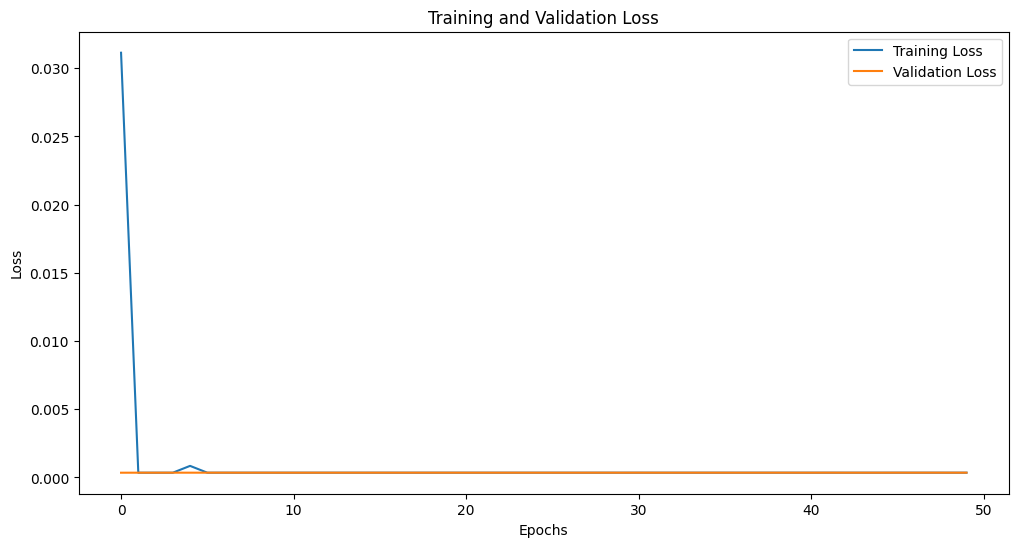

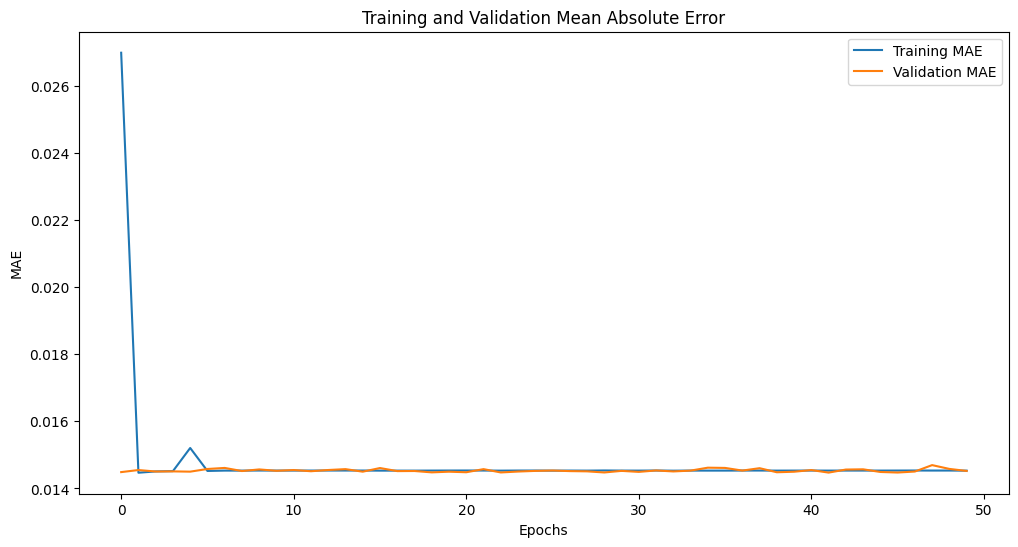

In [4]:
import matplotlib.pyplot as plt

# Visualize training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize training and validation MAE
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [71]:
import seaborn as sns

# Calculate the absolute errors
errors = abs(y_test - y_pred)

# Plot the error distribution
plt.figure(figsize=(12, 6))
sns.histplot(errors.flatten(), kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


NameError: name 'y_pred' is not defined